# Project: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Several business questions will be addressed ahead in order to improve the business performance and profitability. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Required libraries import

In [1]:
# Libraries for data manipulation.
import numpy as np
import pandas as pd

# Libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To ignore warnings.

# Command to actually display the graphs.
%matplotlib inline

## Understanding the structure of the data

In [2]:
# Read the data.
df = pd.read_csv('/Users/erickgarita/Nextcloud2/Documents/Informatica/Data Science Projects/FoodHub/foodhub_order.csv', encoding = 'latin1', sep = ';') # Sep sets the separator to ';'.
# Returns the first 5 rows.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,"30,75",Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,"12,08",Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,"12,23",Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,"29,2",Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,"11,59",Weekday,4,25,24


In [3]:
df.shape

(1898, 9)

The dataset contains 1898 rows and 9 columns. Each row is an order placed by a customer


In [4]:
# Datatypes in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               1898 non-null   int64 
 1   customer_id            1898 non-null   int64 
 2   restaurant_name        1898 non-null   object
 3   cuisine_type           1898 non-null   object
 4   cost_of_the_order      1898 non-null   object
 5   day_of_the_week        1898 non-null   object
 6   rating                 1898 non-null   object
 7   food_preparation_time  1898 non-null   int64 
 8   delivery_time          1898 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 133.6+ KB


There are no null values in the dataset. The first 2 and last 2 columns are integers, while the rest are object types


In [5]:
# Convert the cost_of_the_order column from object type to float data type.
df['cost_of_the_order'] = df['cost_of_the_order'].str.replace(',', '.').astype(float)

In [6]:
# Statistical summary of the dataset.
df.drop(columns = ['order_id', 'customer_id']).describe(include = 'all').T # Excludes id columns, and includes categorical columns.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### Categorical features 
- The most common ordered restaurant is the "Shake Shack"
- "American" is the most ordered cuisine type
- Most of the orders reported were made on weekends 
- 736 orders were not rated, representing a 39% of the dataset
### Numerical features 
- In average, each food takes ~27 min to be prepared, oscillating between a minimum of 20 min, and a maximum of 35 min
- The average delivery time is of ~24 min, with a minimum of 15 min, and a maximum of 33 min

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [7]:
customers = df['customer_id'].nunique()
orders = df['order_id'].nunique()
restaurants = df['restaurant_name'].nunique()
cuisine_types = df['cuisine_type'].nunique()

print('In the dataset there are {} total unique customers, {} total orders, {} total restaurants, and {} total cuisine types.'.format(customers, orders, restaurants, cuisine_types))

In the dataset there are 1200 total unique customers, 1898 total orders, 178 total restaurants, and 14 total cuisine types.


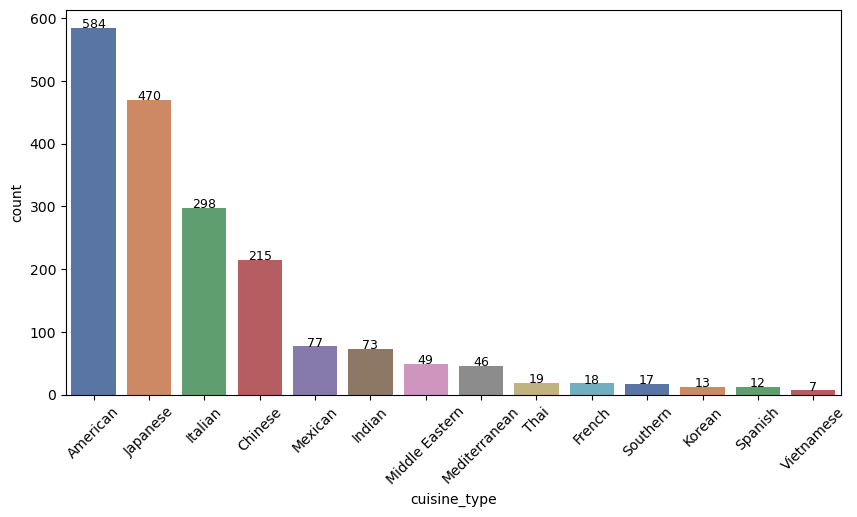

In [ ]:
# Cuisine types countplot with sorted counts.
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index, palette = 'deep') # order by counts in descending order

# Add count labels on top of each bar.
for p in ax.patches: 
    ax.annotate(f'{int(p.get_height())}', # Count labels and adding them at the top of each bar, formatted as integer     
    (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', fontsize = 9) # (x, y) coordinate of the count label; p.get_x() gets the x-coordinate of the bar,
                                                                              # p.get_width() gets the width of the bar, and p.get_height() gets the height of the bar.
plt.xticks(rotation = 45) # Rotate x-axis labels.
plt.show()

#### Cuisine types

Following american food, japanese and italian are the most ordered

Spanish and vietnamese food are the less ordered

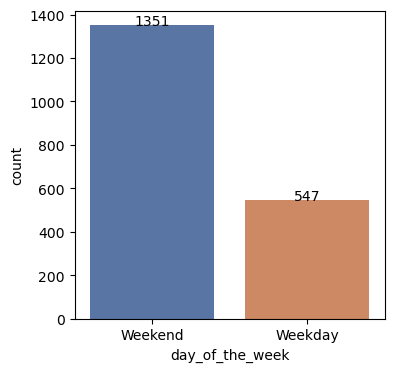

In [10]:
# Days of the week countplot. 
plt.figure(figsize = (4, 4))
ax = sns.countplot(data = df, x = 'day_of_the_week', order = df['day_of_the_week'].value_counts().index, palette = 'deep')

for p in ax.patches: 
    ax.annotate(f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', fontsize = 10)

#### Days of the week
A majority of 1351 orders were placed on weekends, while 547 were on weekdays

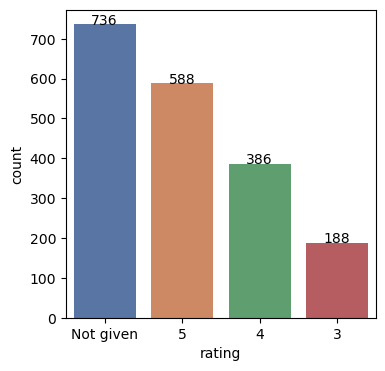

In [12]:
# Rating countplot.
plt.figure(figsize = (4, 4))
ax = sns.countplot(data = df, x='rating', order = df['rating'].value_counts().index, palette = 'deep')

for p in ax.patches: 
    ax.annotate(f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', fontsize = 10)

736 orders were not rated, 588 of them received a 5 stars rating, 386 a 4 stars, and 188 received 3 stars

Ratings 1 and 2 were not used

#### Formula to calculate the optimal number of histogram bins:
$$ binwidth =\frac{(2 * IQR)}{\sqrt[3]{n}} $$
- where n = number of rows of the dataset
- IQR = 22.2975 - 12.08
$$ binwidth =\frac{(2 * 10.2175)}{\sqrt[3]{1898}} $$
- binwidth = 1.65

Then, bins are obtained using the calculated bin-width: $$ bins =\frac{Range}{binwidth} $$
- range = 22.2975 - 12.08
$$ bins =\frac{35.41}{1.65} $$
- bins = 22

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

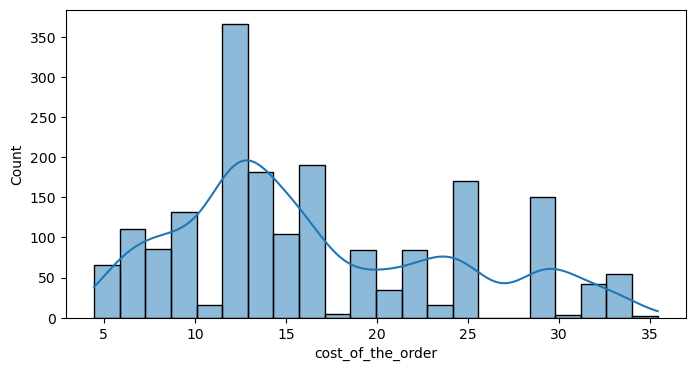

In [13]:
# Cost_of_the_order histogram.
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'cost_of_the_order', bins = 22, kde = True) 

<Axes: xlabel='cost_of_the_order'>

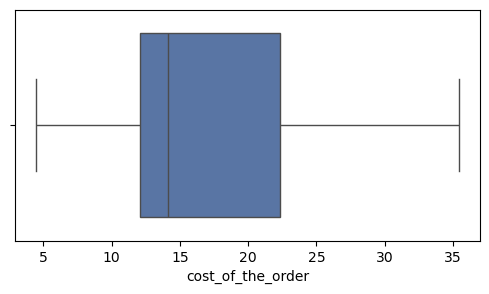

In [14]:
# Cost_of_the_order boxplot.
plt.figure(figsize = (6, 3))
sns.boxplot(data = df, x = 'cost_of_the_order', palette = 'deep')

#### Orders costs

The distribution of the orders costs is right-skewed. ~12 stands out as the most frequent cost

Half of total costs are ~14 or below, and 25% are ~23 or higher

<Axes: xlabel='food_preparation_time', ylabel='Count'>

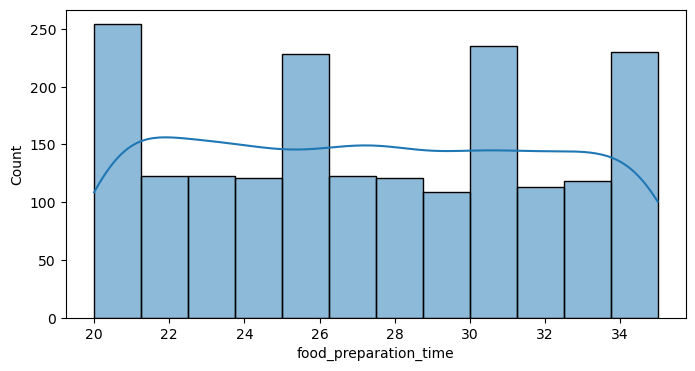

In [15]:
# Food_preparation_time histogram.
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'food_preparation_time', bins = 12, kde = True) # Following above formula, 12 is the ideal number of bins.

<Axes: xlabel='food_preparation_time'>

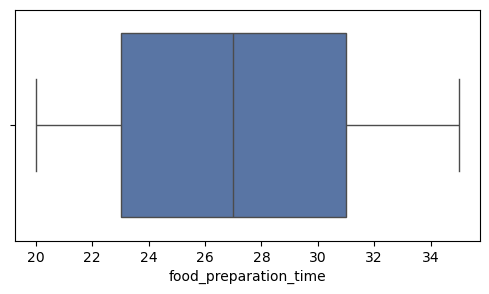

In [16]:
# food_preparation_time boxplot.
plt.figure(figsize = (6, 3))
sns.boxplot(data = df, x = 'food_preparation_time', palette = 'deep')

#### Food preparation time
The distribution of preparation time is multimodal with peaks around 20, 26, 30 and 34 min 

Half of the food ordered takes 27 min or less to be prepared

### Other general insights

In [17]:
# Top 5 restaurants in terms of the number of orders received.
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [18]:
# Most popular cuisine on weekends.
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(5)

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

In [19]:
df_greater_than_20 = ((df[df['cost_of_the_order'] > 20].shape[0]) / df.shape[0])*100
df_greater_than_20

print('Percentage of orders with a cost higher than 20 is:', round(df_greater_than_20, 2))

Percentage of orders with a cost higher than 20 is: 29.24


In [20]:
mean_order_delivery_time = df['delivery_time'].mean()
print('The mean order delivery time is:', round(mean_order_delivery_time, 2))

The mean order delivery time is: 24.16


In [21]:
# Top 5 of most frequent customers.
most_frequent_customers = df['customer_id'].value_counts().head(5)
most_frequent_customers

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
Name: count, dtype: int64

#### Summary:
- The top 3 most demanded restaurants are Shake Shack, The Meatball Shop, and Blue Ribbon Sushi
- The top 3 cuisine types on weekends are american, japanese, and italian food
- The top 3 customers are 52832 (13 orders), 47440 (10 orders), and 83287 (9 orders)
- 29.24% of total orders cost higher than 20
- The average delivery time is 24.16 min

### Multivariate Analysis

#### Cuisine vs Cost of the order

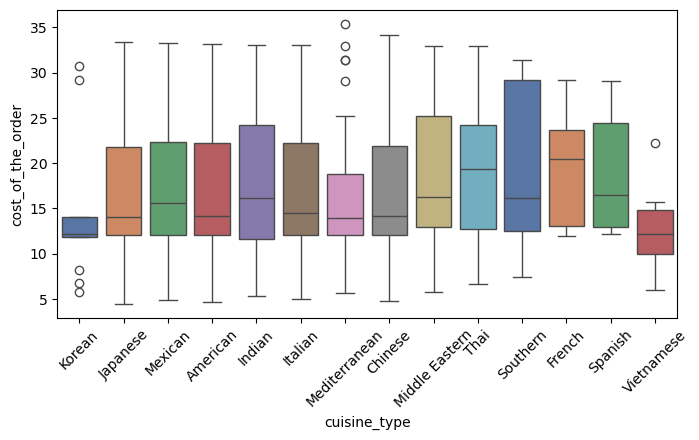

In [23]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Cuisine vs Food preparation time

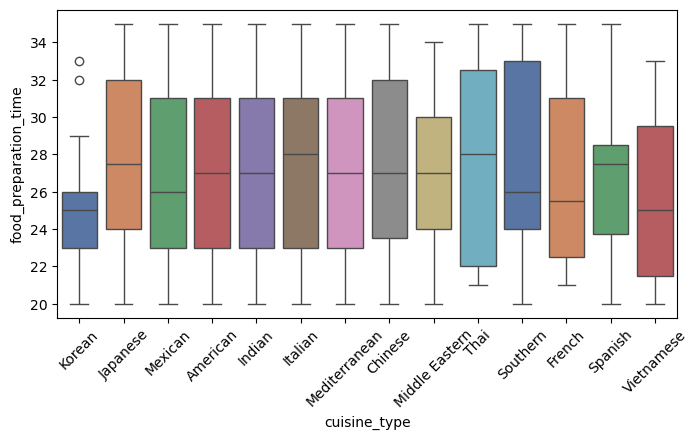

In [24]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Day of the week vs Delivery time

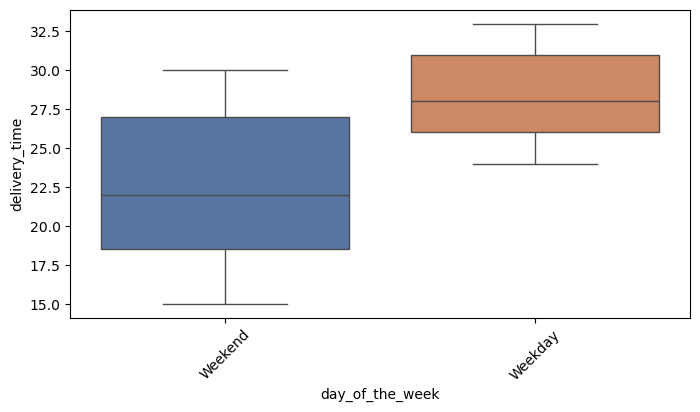

In [25]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Rating vs Delivery time

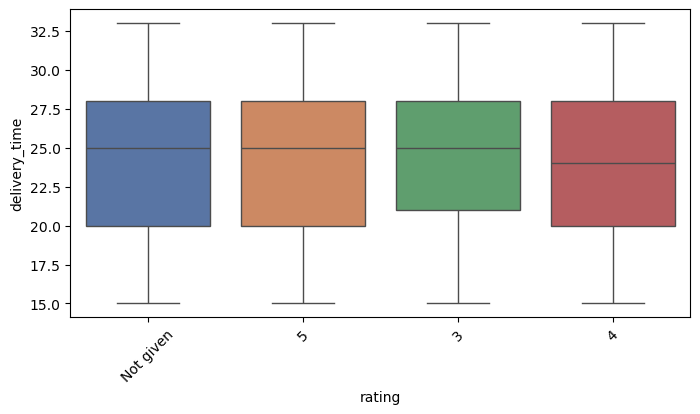

In [26]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'rating', y = 'delivery_time', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Rating vs Food preparation time

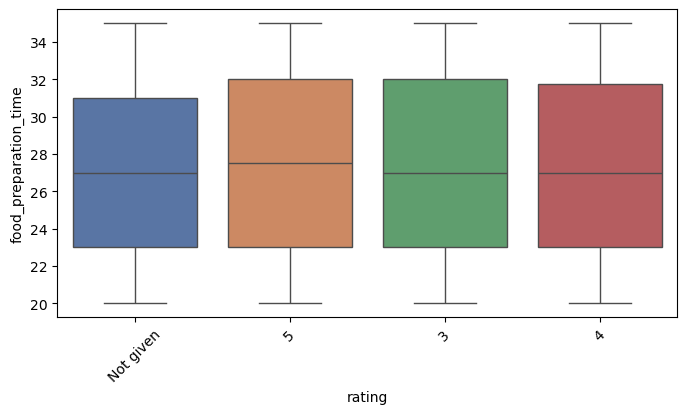

In [27]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Rating vs Cost of the order

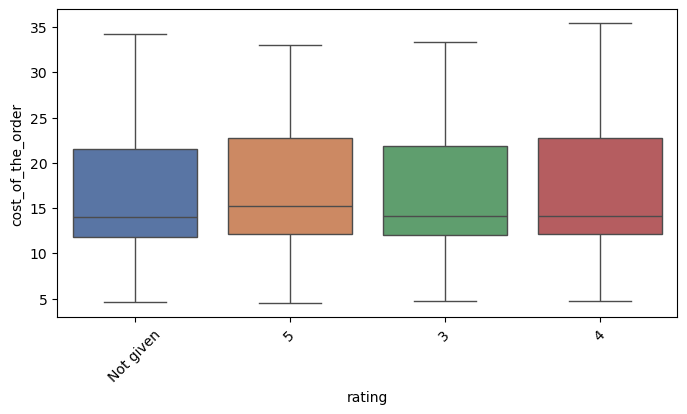

In [28]:
plt.figure(figsize = (8, 4))
sns.boxplot(data = df, x = 'rating', y = 'cost_of_the_order', palette = 'deep')
plt.xticks(rotation = 45)
plt.show()

#### Correlation

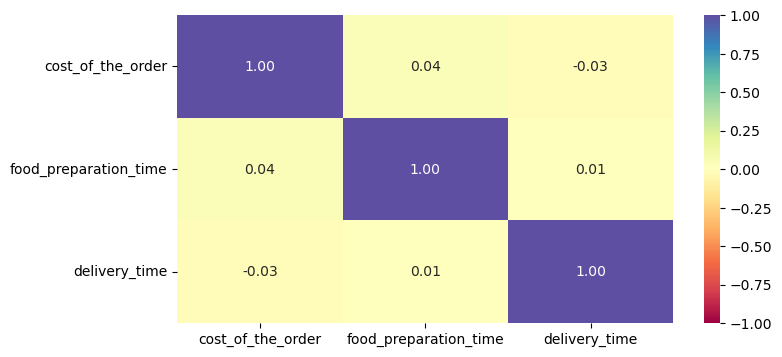

In [31]:
# Heatmap plot.
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (8, 4))
sns.heatmap(df[col_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = 'Spectral')
plt.show()

#### Restaurants having a rating count of more than 50 and a average rating greater than 4

In [32]:
# Filtering rated restaurants.
df_rated = df.loc[df['rating'] != 'Not given'].copy() # Copies the dataframe and removes rows with 'Not given' in the rating column.

df_rated['rating'] = df_rated['rating'].astype(int) # Converts the rating column to integer data type.

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index() # Groups by restaurant name and counts the ratings.
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [33]:
# Restaurants having rating count greater than 50.
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [34]:
# Filtering restaurants with rating count greater than 50.
df_mean_rating = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy

# Restaurant names with their ratings and find the mean rating of each restaurant.
df_mean_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
df_mean_rating


,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


In [35]:
# Function to determine a charge the FoodHub app company applies to the cost of the order, to get revenue.
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['revenue'] = df['cost_of_the_order'].apply(compute_rev) # Applies the function to the cost_of_the_order column.
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [36]:
# To get the total time taken for the order, including food preparation time and delivery time.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [37]:
## Percentage of orders that have more than 60 minutes of total delivery time 
df_greater_than_60 = ((df[df['total_time'] > 60].shape[0]) / df.shape[0])*100
print('The percentage of orders having more than 60 min of total delivery time is:', round(df_greater_than_60, 2))

The percentage of orders having more than 60 min of total delivery time is: 10.54


In [38]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()), 'minutes')


The mean delivery time on weekdays is around 28 minutes


## Conclusion and Recommendations

### Conclusions:
1.	Customer Preferences:
- American cuisine is the most popular, followed by Japanese and Italian.
- Orders peak during weekends, with 71% of the orders placed on Saturday and Sunday.
- A significant percentage of orders (39%) are unrated, indicating potential gaps in feedback collection.
2.	Order Characteristics:
- The cost of orders is right-skewed, with the majority costing around $12.
- The average food preparation time is 27 minutes, with noticeable peaks at specific time intervals (20, 26, 30, 34 minutes).
- 29.24% of total orders exceed $20, potentially representing a premium segment.
3.	Operational Insights:
- The average delivery time is 24 minutes, but a small percentage of orders take over 60 minutes, which could affect customer satisfaction.
- Restaurants with more than 50 ratings and an average rating above 4 indicate strong customer loyalty and high performance.
4.	Correlation and Multivariate Analysis:
- Cuisine type influences order cost, with some cuisines consistently costing more.
- Delivery times are marginally longer on weekends compared to weekdays.
- High ratings correlate with higher food preparation times, suggesting customers value quality over speed.

### Recommendations:

*  

---